## Explolatory analysis of the Dataset for the _Feinschmecker - Recipe Companion_ project

-------

#### Libraries for the EDA:

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import math
import numpy as np
from urllib.parse import urlparse
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mmart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\mmart\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### `0. Reading the data`

In [5]:
with open('./Data/recipes.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [6]:
data[0]

{'title': 'American pancakes',
 'image': 'https://images.immediate.co.uk/production/volatile/sites/30/2024/03/cropped-GF-new-teal-1-7004649-a80b70d.png?quality=90&webp=true&resize=265,65',
 'source': 'https://www.bbcgoodfood.com/recipes/american-pancakes',
 'time': 55,
 'ingredients': [{'id': '200g self-raising flour',
   'ingredient': 'self-raising flour',
   'amount': 200,
   'unit': 'g'},
  {'id': '1 ½ tsp baking powder',
   'ingredient': 'baking powder',
   'amount': 1,
   'unit': 'tsp'},
  {'id': '1 tbsp golden caster sugar',
   'ingredient': 'golden caster sugar',
   'amount': 1,
   'unit': 'tbsp'},
  {'id': '3 large eggs', 'ingredient': 'large eggs', 'amount': 3, 'unit': ''},
  {'id': '25g melted butter plus extra for cooking',
   'ingredient': 'melted butter plus extra for cooking',
   'amount': 25,
   'unit': 'g'},
  {'id': '200ml milk', 'ingredient': 'milk', 'amount': 200, 'unit': 'ml'},
  {'id': 'vegetable oil for cooking',
   'ingredient': 'vegetable oil for cooking',
   'a

------

### `1. Checking how many recipies we have in our dataset`

In [7]:
print(f"For the dataset, we have {len(data)} recipes.")

For the dataset, we have 90 recipes.


-----

### `2. Overall strructure of each instance`

In [8]:
print("For each recipe, we have the following fields:\n")
for i, key in enumerate(data[0].keys(), start=1):
    print(f"{i}. {key}")

For each recipe, we have the following fields:

1. title
2. image
3. source
4. time
5. ingredients
6. instructions
7. nutrients
8. author
9. vegan
10. vegetarian
11. meal type


In [9]:
df_first_entry_analysis = pd.DataFrame({
    "Field": list(data[0].keys()),
    "Data Type": [type(data[0][key]) for key in data[0].keys()],
    "Example Data": [data[0][key] for key in data[0].keys()]
})
df_first_entry_analysis


,Field,Data Type,Example Data
0,title,<class 'str'>,American pancakes
1,image,<class 'str'>,https://images.immediate.co.uk/production/vola...
2,source,<class 'str'>,https://www.bbcgoodfood.com/recipes/american-p...
3,time,<class 'int'>,55
4,ingredients,<class 'list'>,"[{'id': '200g self-raising flour', 'ingredient..."
5,instructions,<class 'list'>,"[step 1Mix 200g self-raising flour, 1 ½ tsp ba..."
6,nutrients,<class 'dict'>,"{'kcal': 356.0, 'fat': 13.0, 'saturates': 6.0,..."
7,author,<class 'str'>,Miriam Nice
8,vegan,<class 'bool'>,False
9,vegetarian,<class 'bool'>,True


In [10]:
for _, row in df_first_entry_analysis.iterrows():
    dtype = row['Data Type']
    is_dict_type = dtype is dict or (isinstance(dtype, str) and 'dict' in dtype)
    if is_dict_type:
        print(f"\nField '{row['Field']}' contains nested dictionaries. Here is a sample from the first entry:")
        print(row['Example Data'])


Field 'nutrients' contains nested dictionaries. Here is a sample from the first entry:
{'kcal': 356.0, 'fat': 13.0, 'saturates': 6.0, 'carbs': 46.0, 'sugars': 8.0, 'fibre': 2.0, 'protein': 13.0, 'salt': 1.3}


In [11]:
df = pd.json_normalize(data)
df.head()

,title,image,source,time,ingredients,instructions,author,vegan,vegetarian,meal type,nutrients.kcal,nutrients.fat,nutrients.saturates,nutrients.carbs,nutrients.sugars,nutrients.fibre,nutrients.protein,nutrients.salt
0,American pancakes,https://images.immediate.co.uk/production/vola...,https://www.bbcgoodfood.com/recipes/american-p...,55,"[{'id': '200g self-raising flour', 'ingredient...","[step 1Mix 200g self-raising flour, 1 ½ tsp ba...",Miriam Nice,False,True,Breakfast,356.0,13.0,6.0,46.0,8.0,2.0,13.0,1.30
1,The breakfast club,https://images.immediate.co.uk/production/vola...,https://www.bbcgoodfood.com/recipes/the-breakf...,55,"[{'id': '3 tbsp sunflower oil', 'ingredient': ...",[step 1Heat the oven to 220C/200C fan/gas 7. R...,Barney Desmazery,False,False,Breakfast,991.0,51.0,16.0,85.0,13.0,16.0,41.0,4.74
2,Pain au chocolat,https://images.immediate.co.uk/production/vola...,https://www.bbcgoodfood.com/recipes/pain-au-ch...,60,"[{'id': '420g plain flour', 'ingredient': 'pla...",[step 1Make the dough in a stand mixer. Combin...,Abi Pastry,False,True,Breakfast,540.0,31.0,19.0,54.0,12.0,4.0,8.0,1.04
3,Leek & kale hash with sage fried eggs,https://images.immediate.co.uk/production/vola...,https://www.bbcgoodfood.com/recipes/leek-kale-...,60,[{'id': '800g Maris Piper potatoes cut into la...,[step 1Tip the potatoes into a large pan of co...,Ailsa Burt,False,True,Breakfast,431.0,26.0,7.0,32.0,3.0,5.0,14.0,0.40
4,Cheese omelette,https://images.immediate.co.uk/production/vola...,https://www.bbcgoodfood.com/recipes/cheese-ome...,10,"[{'id': '2 eggs', 'ingredient': 'eggs', 'amoun...",[step 1Crack the eggs into a jug and whisk wel...,Ailsa Burt,False,True,Breakfast,363.0,33.0,14.0,0.1,0.1,0.0,17.0,0.95


In [12]:
df.describe()

,time,nutrients.kcal,nutrients.fat,nutrients.saturates,nutrients.carbs,nutrients.sugars,nutrients.fibre,nutrients.protein,nutrients.salt
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,89.000000
mean,42.900000,459.855778,22.273667,7.797778,38.725556,9.634444,5.583333,22.890000,1.533371
std,43.632029,173.219741,12.232227,6.455361,20.041612,7.413155,4.023282,11.224833,1.081387
min,5.000000,74.000000,4.000000,0.100000,0.000000,0.000000,0.000000,2.000000,0.150000
25%,20.000000,351.500000,13.250000,3.000000,26.000000,4.000000,3.000000,14.000000,0.790000
50%,35.000000,457.000000,22.000000,6.000000,40.000000,8.000000,5.000000,21.000000,1.250000
75%,55.000000,554.250000,29.000000,11.500000,53.000000,13.000000,7.000000,30.750000,2.000000
max,390.000000,1007.000000,68.000000,35.000000,86.000000,40.000000,18.000000,51.000000,4.740000


In [13]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))


Numeric columns: ['time', 'nutrients.kcal', 'nutrients.fat', 'nutrients.saturates', 'nutrients.carbs', 'nutrients.sugars', 'nutrients.fibre', 'nutrients.protein', 'nutrients.salt']
Categorical columns: ['title', 'image', 'source', 'ingredients', 'instructions', 'author', 'vegan', 'vegetarian', 'meal type']


-----

### `3. Looking for duplicates and missing values`

In [14]:
def norm_for_unique(x):
    if isinstance(x, (list, dict)):
        try:
            return json.dumps(x, ensure_ascii=False, sort_keys=True)
        except TypeError:
            return str(x)
    return x

dup_titles = df[df['title'].duplicated(keep=False)].copy()

for title, group in dup_titles.groupby('title'):
    if len(group) <= 1:
        continue
    print(f"\n----- Differences for: {title} -----")
    diffs = {}
    for col in df.columns:
        uniques = pd.unique(group[col].map(norm_for_unique))
        if len(uniques) > 1:
            diffs[col] = uniques.tolist()
    # pretty print (truncate long strings)
    for k, vals in diffs.items():
        shown = [v if len(str(v)) <= 160 else str(v)[:157] + "…" for v in vals]
        print(f"-> {k}: {shown}")


----- Differences for: Chicken pasta bake -----
-> meal type: ['Dinner', 'misc']

----- Differences for: Speedy lentil coconut curry -----
-> meal type: ['Dinner', 'misc']

----- Differences for: Veggie sausage casserole -----
-> meal type: ['Dinner', 'misc']


_removing duplicated recipies_ <br>

we have decided to leave only the Dinner category and remove the ones with misc categry.

In [15]:
df_cleaned = df[
    (~df['title'].isin(dup_titles['title'])) | 
    ((df['title'].isin(dup_titles['title'])) & (df['meal type'] == 'Dinner'))
].copy()

print(f"Before: {len(df)} recipes")
print(f"After cleaning: {len(df_cleaned)} recipes")

Before: 90 recipes
After cleaning: 87 recipes


In [16]:
df = df_cleaned.copy()

Now looking for the missing values:

In [17]:
missing = df.isna().sum().to_frame("Missing Values")
missing["% Missing"] = (missing["Missing Values"] / len(df) * 100).round(2)
display(missing.sort_values(by="Missing Values", ascending=False))


,Missing Values,% Missing
nutrients.salt,1,1.15
title,0,0.00
image,0,0.00
source,0,0.00
ingredients,0,0.00
time,0,0.00
author,0,0.00
vegan,0,0.00
vegetarian,0,0.00
instructions,0,0.00


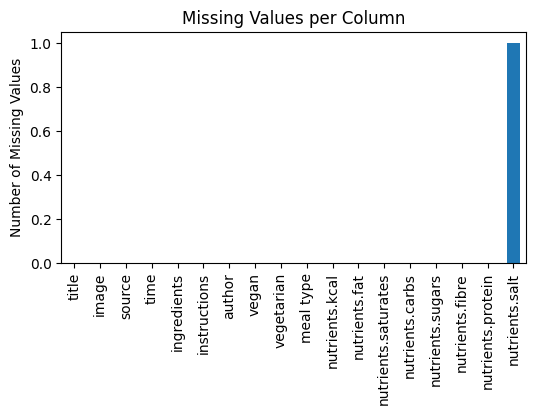

In [18]:
df.isna().sum().plot(kind='bar', figsize=(6, 3), title='Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.show()

Since we have only 1 value that is missing (nutricients.salt) we have decided to fill it with an average of the rest of the recipies since our dataset is not as big and we do not want to loose any of them.

In [19]:
df["nutrients.salt"] = df["nutrients.salt"].fillna(df["nutrients.salt"].mean())
missing = df.isna().sum().to_frame("Missing Values")
missing["% Missing"] = (missing["Missing Values"] / len(df) * 100).round(2)
display(missing.sort_values(by="Missing Values", ascending=False))

,Missing Values,% Missing
title,0,0.0
image,0,0.0
source,0,0.0
time,0,0.0
ingredients,0,0.0
instructions,0,0.0
author,0,0.0
vegan,0,0.0
vegetarian,0,0.0
meal type,0,0.0


now we see that we do not have any missing values :)

In [20]:
empty_ingredients = df['ingredients'].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
empty_instructions = df['instructions'].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()

print(f"Empty ingredient lists: {empty_ingredients}")
print(f"Empty instruction lists: {empty_instructions}")


Empty ingredient lists: 0
Empty instruction lists: 0


Here we just lower and handle possible exceptions for the future regarding of different capitalization of the recipie's author name

In [21]:
df['author'] = df['author'].str.lower().str.strip().replace('', 'unknown')
df['author']

0             miriam nice
1        barney desmazery
2              abi pastry
3              ailsa burt
4              ailsa burt
             ...         
84        chelsie collins
85            cassie best
86            cassie best
87       samuel goldsmith
89    helena busiakiewicz
Name: author, Length: 87, dtype: object

-----

### `4. Analysis of distributions for numerical data and categories for categorical data`

#### `4.1 Distributions of numerical features`

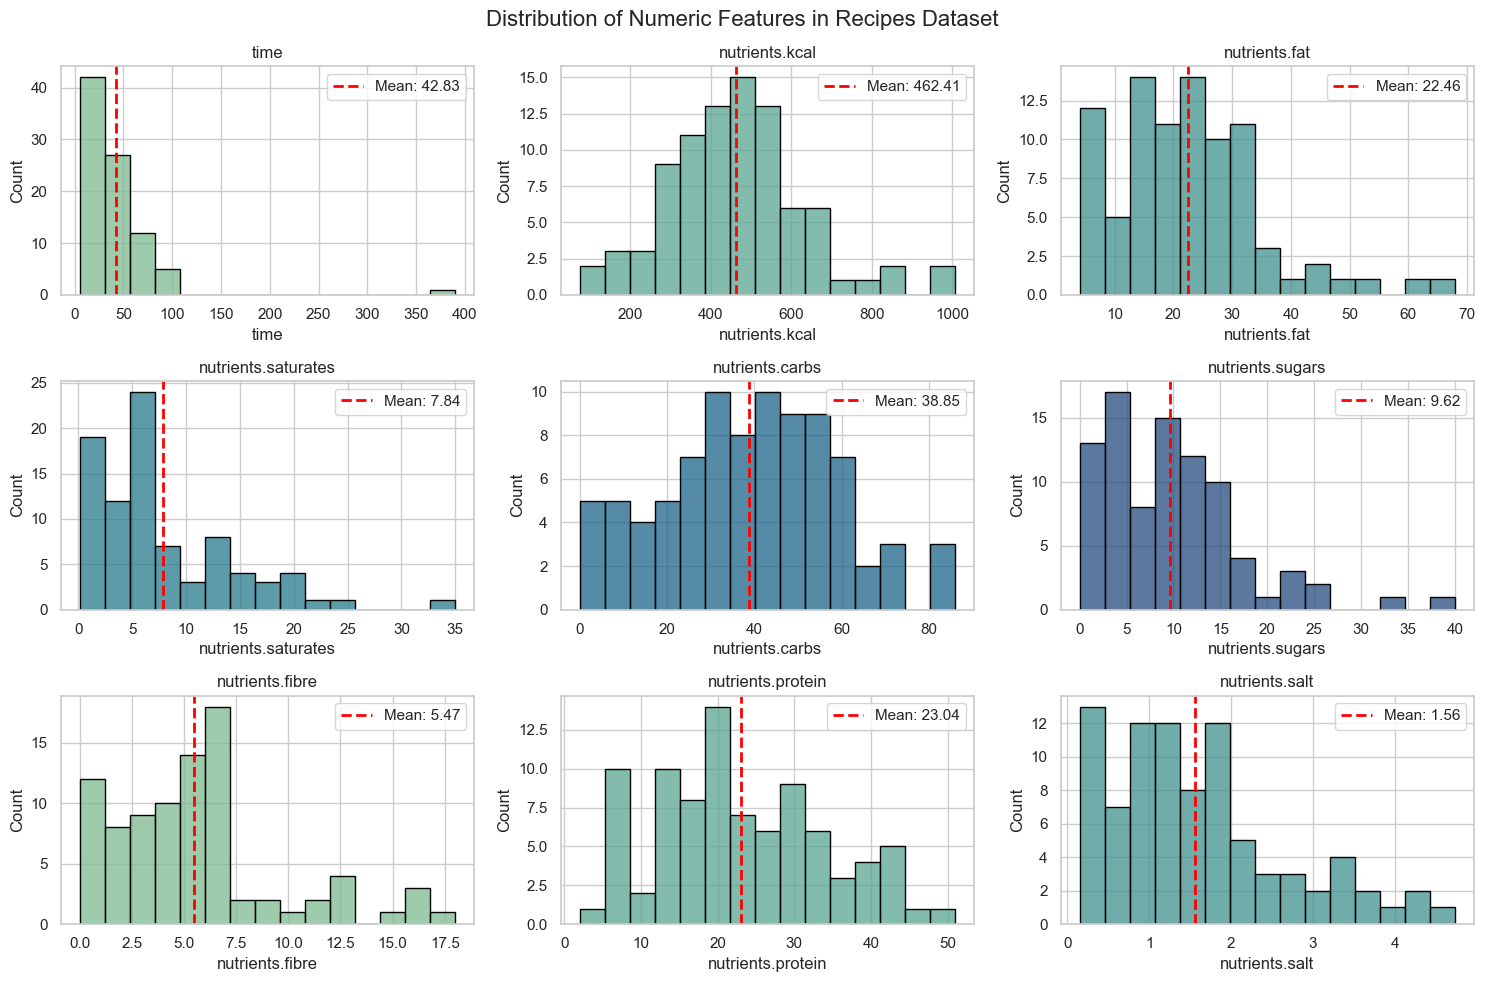

In [22]:
sns.set_theme(style="whitegrid")

num_cols = numeric_cols

fig, axes = plt.subplots(
    nrows=math.ceil(len(num_cols) / 3),
    ncols=3,
    figsize=(15, 10)
)

axes = axes.flatten()
i=0
for ax, col in zip(axes, num_cols):
    sns.histplot(
        df[col],
        bins=15,
        ax=ax,
        color=sns.color_palette("crest")[i],   
        edgecolor="black"
    )
    
    # mean line
    mean_val = df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
    ax.legend()
    ax.set_title(col)
    i = (i + 1) % len(sns.color_palette("crest"))
# turn off unused axes
for j in range(len(num_cols), len(axes)):
    axes[j].axis("off")

plt.suptitle("Distribution of Numeric Features in Recipes Dataset", fontsize=16)
plt.tight_layout()
plt.show()


All of the distributions match our expectations and because of that they will nt be further cleaned.

#### `4.2 Distributions of categorical features that are not nested`

In [23]:
categorical_cols_not_nested = [col for col in categorical_cols if not df[col].map(type).isin([dict, list]).any()]
print("Categorical columns without nested structures:", categorical_cols_not_nested)
categorical_cols_nested = set(categorical_cols) - set(categorical_cols_not_nested)
print("Categorical columns with nested structures:", list(categorical_cols_nested))

Categorical columns without nested structures: ['title', 'image', 'source', 'author', 'vegan', 'vegetarian', 'meal type']
Categorical columns with nested structures: ['ingredients', 'instructions']



Analyzing categorical column: author


C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\1079975244.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


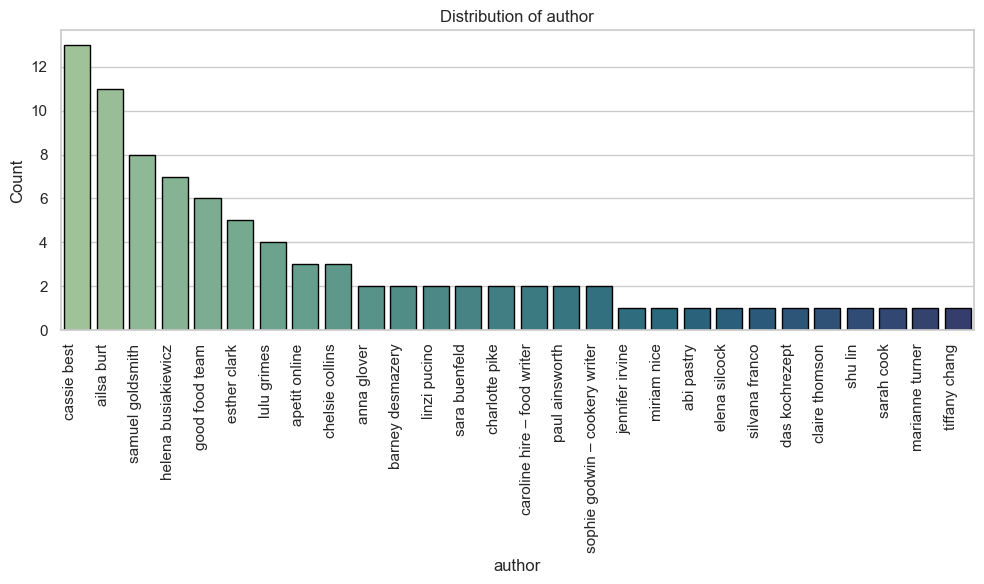


Analyzing categorical column: vegan


C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\1079975244.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


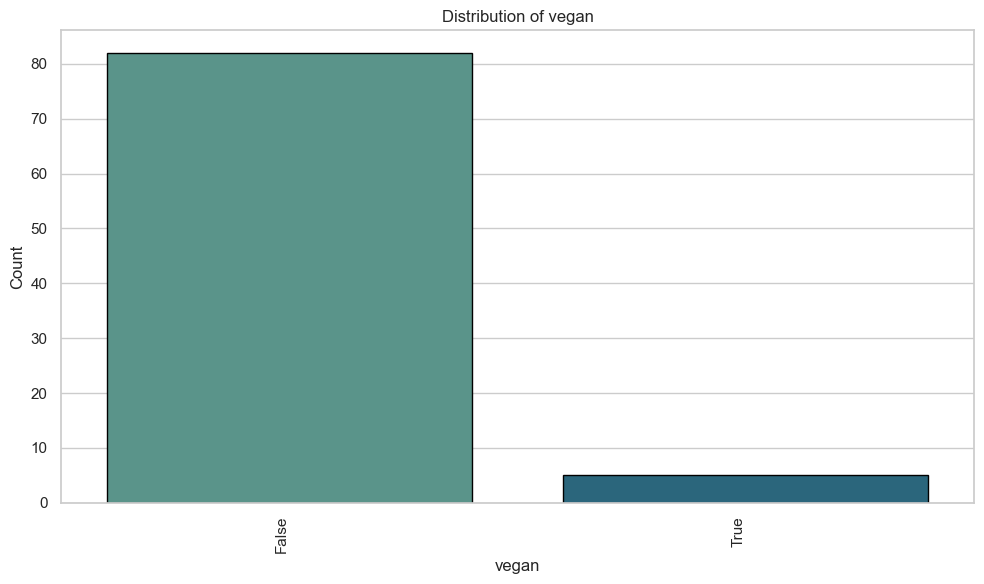


Analyzing categorical column: vegetarian


C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\1079975244.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


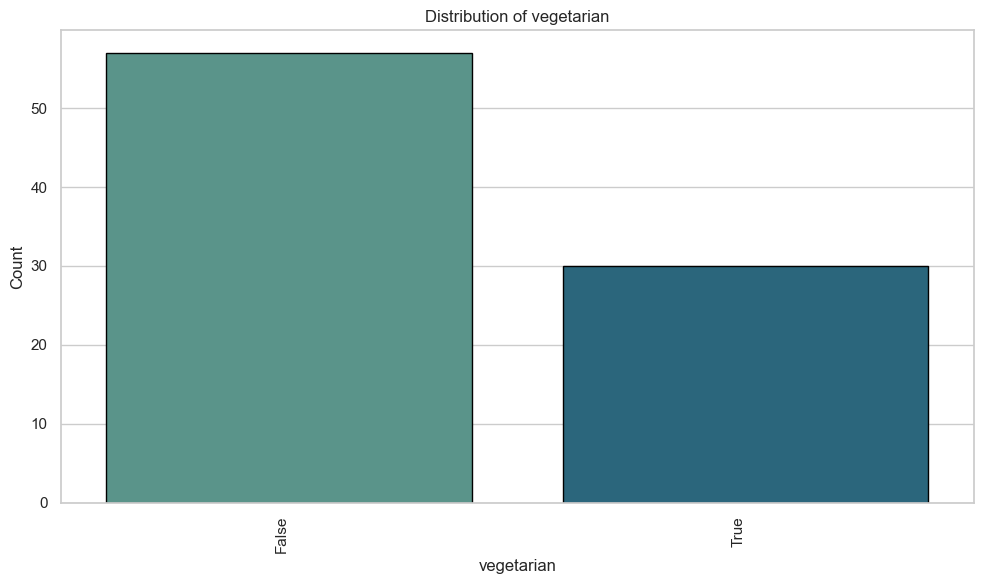

C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\1079975244.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Analyzing categorical column: meal type


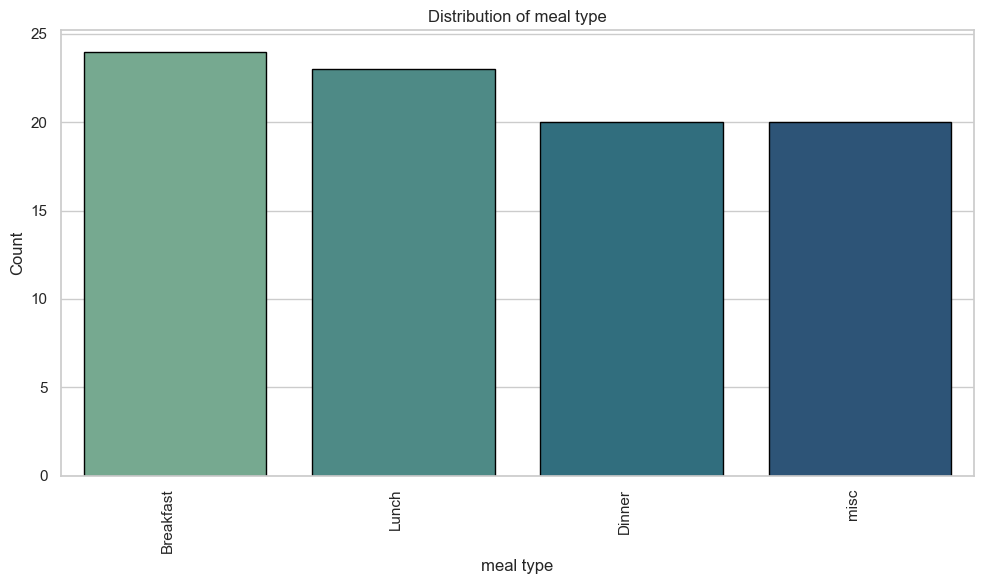

In [24]:
sns.set_theme(style="whitegrid")

categorical_cols_not_nested = [
    c for c in categorical_cols_not_nested if c not in ['title', 'image', 'source']
]

for col in categorical_cols_not_nested:
    print(f"\nAnalyzing categorical column: {col}")
    
    plt.figure(figsize=(10,6))
    
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, "count"]
    
    sns.barplot(
        data=counts,
        x=col,
        y="count",
        palette="crest",
        edgecolor="black"
    )
    
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90, ha="right")
    
    plt.tight_layout()
    plt.show()


C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\1521688668.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='meal type', y='time', palette='crest')


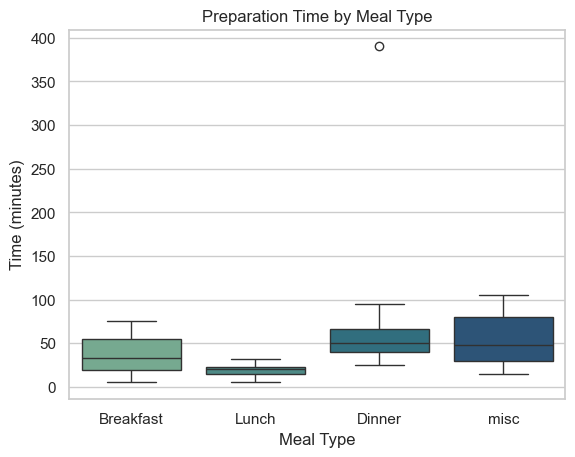

In [25]:
sns.boxplot(data=df, x='meal type', y='time', palette='crest')
plt.title("Preparation Time by Meal Type")
plt.ylabel("Time (minutes)")
plt.xlabel("Meal Type")
plt.show()

In [26]:
if 'meal type' in df.columns:
    meal_summary = (
        df.groupby('meal type')[['time', 'nutrients.kcal', 'nutrients.fat',
                                 'nutrients.protein', 'nutrients.carbs']]
        .agg(['count', 'mean', 'min', 'max'])
        .round(1)
    )
    display(meal_summary)

time                nutrients.kcal                        \
          count  mean min  max          count   mean    min     max   
meal type                                                             
Breakfast    24  35.0   6   75             24  466.8   74.0  1007.0   
Dinner       20  69.0  25  390             20  481.4  282.0   662.0   
Lunch        23  19.2   5   32             23  461.7  175.0   795.0   
misc         20  53.2  15  105             20  439.0  193.0   647.0   

          nutrients.fat                  nutrients.protein                    \
                  count  mean  min   max             count  mean   min   max   
meal type                                                                      
Breakfast            24  23.9  5.0  68.0                24  18.8   2.0  47.0   
Dinner               20  21.6  8.0  33.0                20  22.4   6.0  36.0   
Lunch                23  23.1  6.0  60.0                23  25.4   6.0  44.0   
misc                 20  20.8  4.0  45.0                20  26.0  11.0  51.0   

          nutrients.carbs                   
                    count  mean  min   max  
meal type                                   
Breakfast              24  41.8  0.0  85.0  
Dinner                 20  44.2  6.0  86.0  
Lunch                  23  35.0  1.0  61.0  
misc                   20  34.3  2.0  59.0

#### `4.3 Analysis of the source website`

In [27]:
def extract_source_domain(url):
    if isinstance(url, str) and url:
        host = urlparse(url).netloc.replace('www.', '')
        return host.split('.')[0] 
    return 'unknown'

# create/clean the domain column
df['source_domain'] = df['source'].apply(extract_source_domain).fillna('unknown')

# counts with guaranteed column names
source_counts = (
    df['source_domain']
      .value_counts(dropna=False)
      .reset_index()
)
source_counts.columns = ['source_domain', 'count']  # force names
source_counts = source_counts.sort_values('count', ascending=False)

source_counts

,source_domain,count
0,bbcgoodfood,87


From thsi we see that all fo the recipies come from only one website - **bbcgoodfood**

----

#### `4.4 Analysis of the nutritions values`

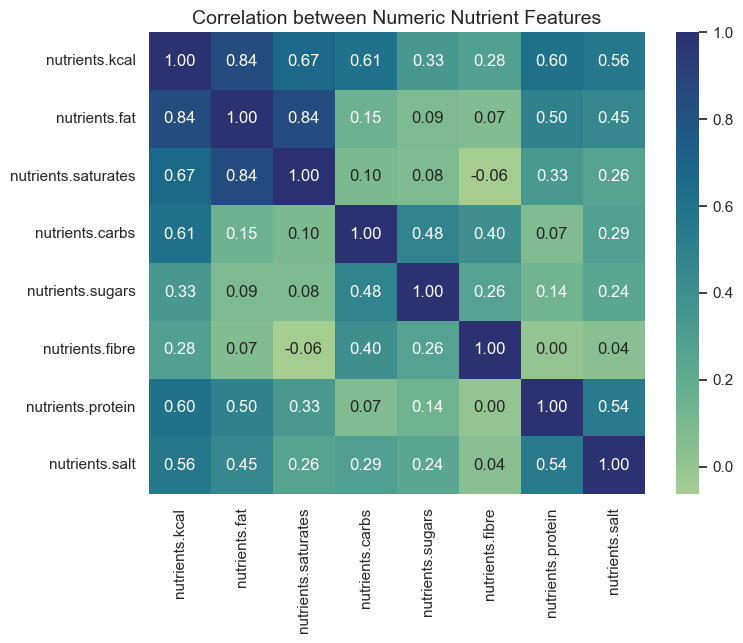

In [28]:
nutrition_cols = [col for col in numeric_cols if 'nutrition' in col.lower() or 'nutrient' in col.lower()]
plt.figure(figsize=(8,6))
sns.heatmap(df[nutrition_cols].corr(), annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation between Numeric Nutrient Features", fontsize=14)
plt.show()


In [29]:
# no standarization
# nutrient_cols = [c for c in df.columns if c.startswith('nutrients.')]
# plt.figure(figsize=(10,6))
# sns.boxplot(data=df[nutrient_cols], orient='h', palette='crest')
# plt.title("Distribution of Nutrient Values Across Recipes")
# plt.xlabel("Value")
# plt.tight_layout()
# plt.show()

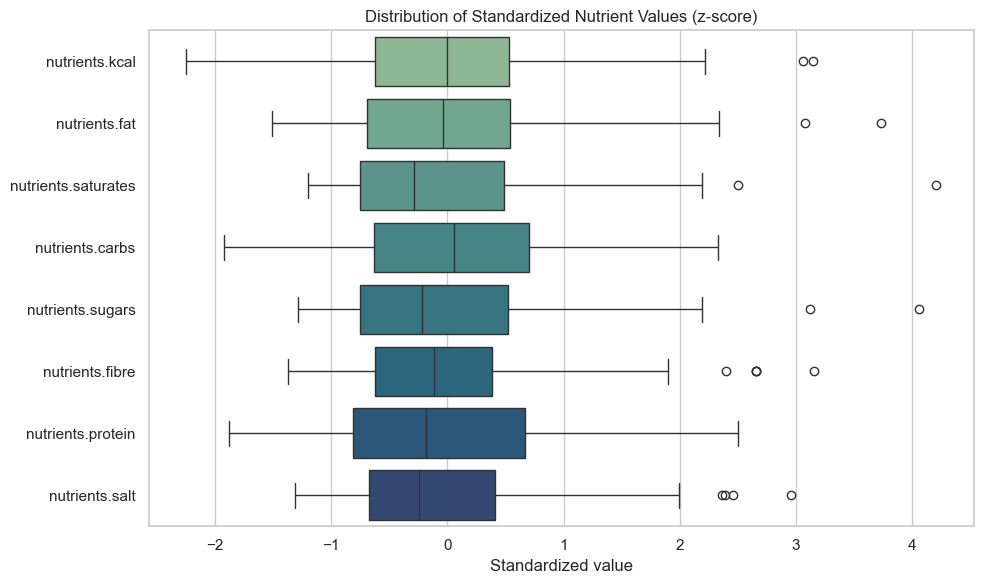

In [30]:
nutrient_cols = [c for c in df.columns if c.startswith('nutrients.')]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[nutrient_cols] = scaler.fit_transform(df[nutrient_cols])

plt.figure(figsize=(10,6))
sns.boxplot(data=df_scaled[nutrient_cols], orient='h', palette='crest')
plt.title("Distribution of Standardized Nutrient Values (z-score)")
plt.xlabel("Standardized value")
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

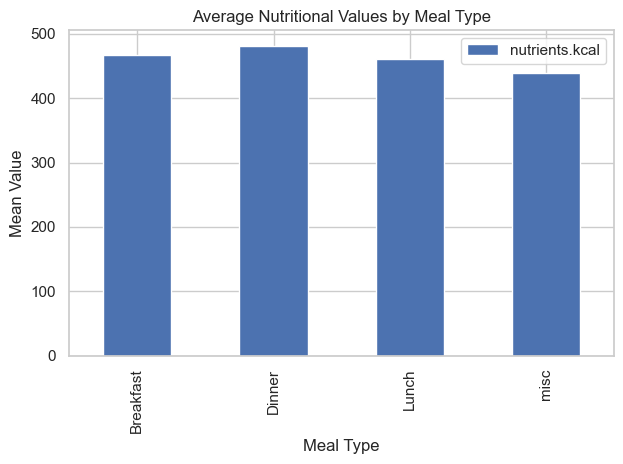

In [31]:
plt.figure(figsize=(8,5))
df.groupby('meal type')[['nutrients.kcal']].mean().plot(kind='bar')
plt.title("Average Nutritional Values by Meal Type")
plt.ylabel("Mean Value")
plt.xlabel("Meal Type")
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

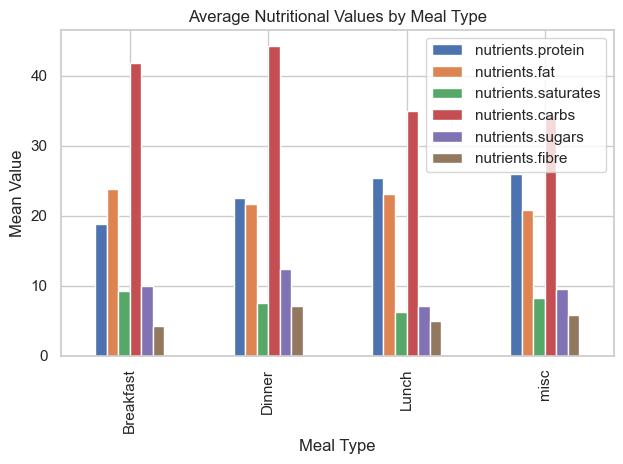

In [32]:
plt.figure(figsize=(8,5))
df.groupby('meal type')[['nutrients.protein','nutrients.fat', "nutrients.saturates",'nutrients.carbs', "nutrients.sugars", "nutrients.fibre"]].mean().plot(kind='bar')
plt.title("Average Nutritional Values by Meal Type")
plt.ylabel("Mean Value")
plt.xlabel("Meal Type")
plt.tight_layout()
plt.show()

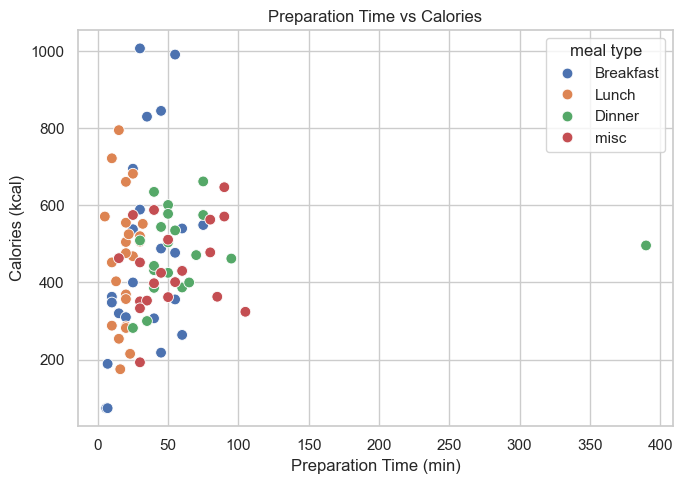

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='time', y='nutrients.kcal', hue='meal type', s=60)
plt.title("Preparation Time vs Calories")
plt.xlabel("Preparation Time (min)")
plt.ylabel("Calories (kcal)")
plt.tight_layout()
plt.show()

----

#### `4.5 Analysis of the ingredients`


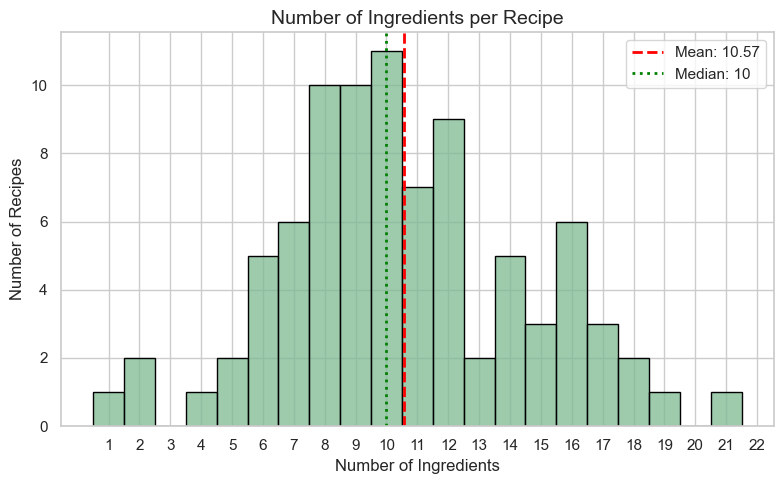

In [34]:
sns.set_theme(style="whitegrid")
crest_color = sns.color_palette("crest")
df['num_ingredients'] = df['ingredients'].apply(lambda x: len(x) if isinstance(x, list) else 0)

bins = range(df['num_ingredients'].min(), df['num_ingredients'].max() + 2)

plt.figure(figsize=(8,5))
sns.histplot(df['num_ingredients'], bins=bins, color=crest_color[0], edgecolor='black', discrete=True)

# stats
mean_val = df['num_ingredients'].mean()
median_val = df['num_ingredients'].median()

# mean and median lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Median: {median_val:.0f}')
plt.title("Number of Ingredients per Recipe", fontsize=14)
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Recipes")
plt.xticks(bins)
plt.legend()
plt.tight_layout()
plt.show()

##### Most common ingredients - raw version without the pattern matching

C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\1626573853.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ingredients, y='ingredient', x='count', palette='crest')


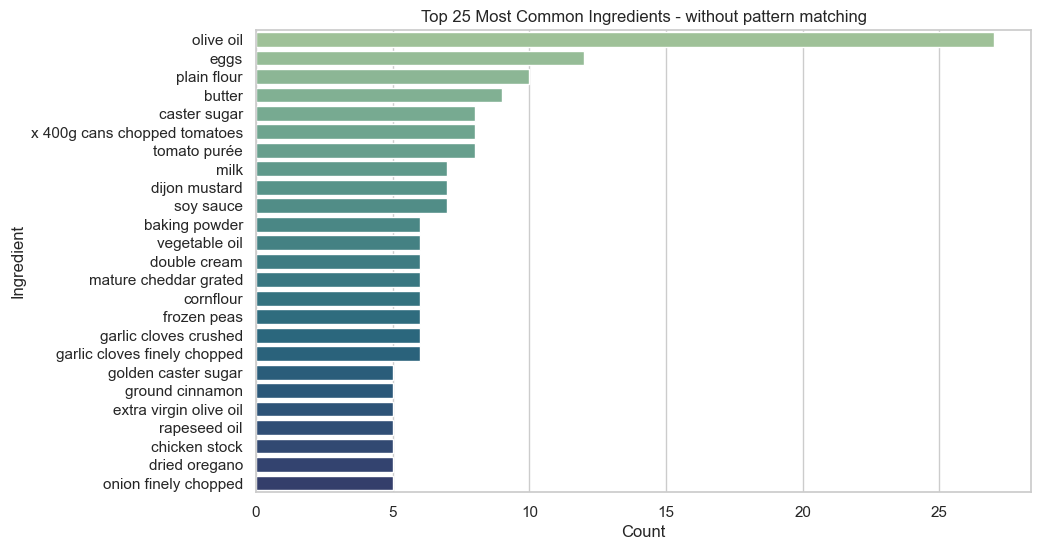

In [35]:
all_ingredients = [
    ing['ingredient'].lower()
    for recipe in data
    for ing in recipe['ingredients']
    if isinstance(ing, dict) and 'ingredient' in ing
]
top_ingredients = pd.DataFrame(Counter(all_ingredients).most_common(25),
                               columns=['ingredient', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_ingredients, y='ingredient', x='count', palette='crest')
plt.title("Top 25 Most Common Ingredients - without pattern matching")
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.show()


##### Most common ingredients - raw version with pattern matching<br>
In here we have mapped some ingredients to the common denomiantor, for example:
- olive oil,
- vegetable oil,
- sunflower oil
are all mapped to the **oil cathegory**<br><br>
Also for this purpose we have ommited some 'parts' of the ingrediens, like:
- canned,
- minced,
- chopped,
- unsalted
For this we just substitute them with an empty string.

In [36]:
def normalize_ingredient(name):
    name = name.lower().strip()
    name = re.sub(r'[^\w\s]', '', name)
    name = re.sub(r'\beggs?\b', 'egg', name)
    name = re.sub(r'\bto serve?\b', 'egg', name)
    name = re.sub(r'\bsmall handful of?\b', '', name)
    name = re.sub(r'\bextra virgin?\b', '', name)
    name = re.sub(r'\bx 400g cans?\b', '', name)
    name = re.sub(r'\bonions?\b', 'onion', name)
    name = re.sub(r'\bspring onion?\b', 'onion', name)
    name = re.sub(r'\bcarrots?\b', 'carrot', name)
    
    name = re.sub(r'\bolive oil?\b', 'oil', name)
    name = re.sub(r'\bvegetable oil?\b', 'oil', name)
    name = re.sub(r'\bsunflower oil?\b', 'oil', name)
    name = re.sub(r'\brapeseed oil?\b', 'oil', name)
    name = re.sub(r'\bmayo?\b', 'maionaisse', name)
    name = re.sub(r'\bthyme rosemary or sage?\b', 'herbes', name)
    name = re.sub(r'\bskinless chicken breasts into strips?\b', 'chicken', name)
    name = re.sub(r'\bplum tomatoes?\b', 'tomatoes', name)
    name = re.sub(r'\bcherry tomatoes?\b', 'tomatoes', name)

    
    name = re.sub(r'\bwine vinegar?\b', 'vinegar', name)
    name = re.sub(r'\bcider vinegar?\b', 'vinegar', name)    
    name = re.sub(r'\bbalsamic vinegar?\b', 'vinegar', name)


    name = re.sub(r'\bgreen salad egg?\b', 'egg', name)
    name = re.sub(r'\bvegetable stock?\b', 'stock', name)
    name = re.sub(r'\bchicken stock?\b', 'stock', name)
    name = re.sub(r'\bchicken bouillon?\b', 'stock', name)
    name = re.sub(r'\blowsalt stock?\b', 'stock', name)
    

    name = re.sub(r'\bbrown soft sugar?\b', 'sugar', name)
    name = re.sub(r'\bsweet smoked paprika?\b', 'paprika', name)
    name = re.sub(r'\bsweet paprika?\b', 'paprika', name)

    name = re.sub(r'\bsmoked paprika?\b', 'paprika', name)
    name = re.sub(r'\bdrizzle honey?\b', 'honey', name)
    name = re.sub(r'\bshallot?\b', 'onion', name)
    name = re.sub(r'\brashers back bacon?\b', 'bacon', name)
    name = re.sub(r'\bavocado halved stoned?\b', 'avocado', name)
    
    name = re.sub(r'\bstrong white bread flour plus extra for dusting?\b', 'bread', name)
    name = re.sub(r'\bleftover garlic parmesan breaded chicken breast see recipe below\b', 'chicken', name)
    name = re.sub(r'\bcut into wedges?\b', '', name)




    name = re.sub(r'\bcloves?\b', '', name)
    name = re.sub(r'\bchopped\b|\bminced\b|\bsliced\b|\bfinely\b|\bgrated\b|\bbeaten\b|\bcrushed\b|\blarge\b|\bfrozen\b|\bground\b|\bmature\b|\bcaster\b|\bdijon\b|\bpurée\b|\bdouble\b|\bgolden\b|\bplain\b', '', name)
    name = re.sub(r'\bred\b|\bselfraising\b|\bfew sprigs of\b|\bwhole\b|\bdried\b|\blight\b|\bcan\b|\bsoftened\b|\broughly\b|\bunsalted\b|\bzested and juiced\b|\bjuiced\b|\bdrained\b|\bsmall bunch of\b|\bpeeled\b|\band\b|\bor\b', '', name)
    name = re.sub(r'\bgreen\b|\bpiece\b|\bof\b|\bthumbsized\b|\bsticks\b|\bplus a pinch\b|\boptional\b|\bsmoked\b|\btrimmed\b|\bmelted\b|\bsmooth\b|\bpinch\b|\bdrizzle\b|\bstreaky\b|\bsmall\b|\bknob\b|\bor\b', '', name)
    name = re.sub(r'\bhalved\b|\bstoned\b|\bdeseeded\b|\bthinly\b|\bripe\b|\bgranules\b|\bvery\b|\bquartered\b|\bfor\b|\bcooking\b|\bsea\b|\bcooked\b|\bcube\b|\bstreaky\b|\bsmall\b|\bknob\b|\bor\b', '', name)

    name = re.sub(r'\s+', ' ', name).strip()
    return name

normalized = [normalize_ingredient(ing['ingredient']) 
              for recipe in data 
              for ing in recipe['ingredients'] 
              if isinstance(ing, dict) and 'ingredient' in ing]

top_ingredients = pd.DataFrame(Counter(normalized).most_common(25),
                               columns=['ingredient', 'count'])




In [37]:
top_ingredients.head(10)

,ingredient,count
0,oil,48
1,onion,42
2,garlic,40
3,egg,25
4,tomatoes,23
5,sugar,21
6,butter,19
7,flour,15
8,stock,14
9,ginger,12


C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\2549243958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ingredients, y='ingredient', x='count', palette='crest')


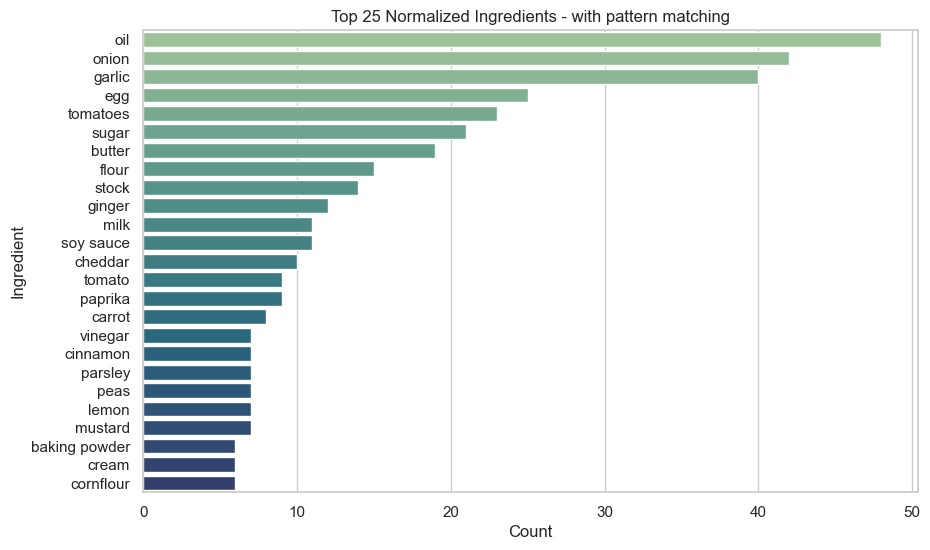

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_ingredients, y='ingredient', x='count', palette='crest')
plt.title("Top 25 Normalized Ingredients - with pattern matching")
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.show()

----

#### `4.6 Analysis of the instructions`


In [39]:
df[["title", "instructions"]]

,title,instructions
0,American pancakes,"[step 1Mix 200g self-raising flour, 1 ½ tsp ba..."
1,The breakfast club,[step 1Heat the oven to 220C/200C fan/gas 7. R...
2,Pain au chocolat,[step 1Make the dough in a stand mixer. Combin...
3,Leek & kale hash with sage fried eggs,[step 1Tip the potatoes into a large pan of co...
4,Cheese omelette,[step 1Crack the eggs into a jug and whisk wel...
...,...,...
84,Turkey bolognese pasta bake,[step 1Heat the olive oil in a large pan. Add ...
85,Creamy halloumi & tomato curry,[step 1Cut the halloumi into bite-sized cubes ...
86,Feel-good pasta soup,"[step 1Heat the oil in a large, deep pan over ..."
87,Chicken & bacon pie,[step 1Heat the oven to 200C/180C fan/gas 6. H...


##### `4.6.1 Number of steps per recipie`

In [40]:
df["num_steps"] = df["instructions"].apply(lambda steps: len(steps) if isinstance(steps, list) else 0)

df[["title", "instructions","num_steps"]]

,title,instructions,num_steps
0,American pancakes,"[step 1Mix 200g self-raising flour, 1 ½ tsp ba...",5
1,The breakfast club,[step 1Heat the oven to 220C/200C fan/gas 7. R...,3
2,Pain au chocolat,[step 1Make the dough in a stand mixer. Combin...,9
3,Leek & kale hash with sage fried eggs,[step 1Tip the potatoes into a large pan of co...,4
4,Cheese omelette,[step 1Crack the eggs into a jug and whisk wel...,2
...,...,...,...
84,Turkey bolognese pasta bake,[step 1Heat the olive oil in a large pan. Add ...,3
85,Creamy halloumi & tomato curry,[step 1Cut the halloumi into bite-sized cubes ...,5
86,Feel-good pasta soup,"[step 1Heat the oil in a large, deep pan over ...",4
87,Chicken & bacon pie,[step 1Heat the oven to 200C/180C fan/gas 6. H...,3


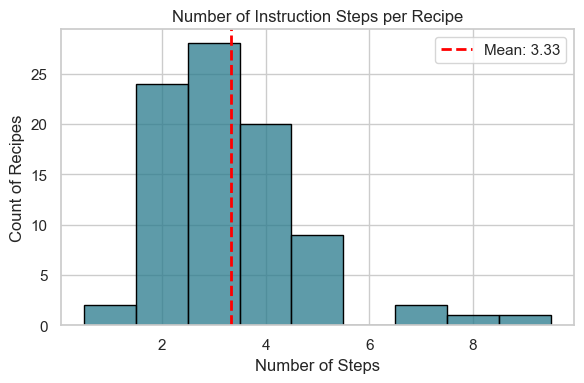

In [41]:
crest_color = sns.color_palette("crest")[3] 
plt.figure(figsize=(6,4))
sns.histplot(
    df["num_steps"],
    bins=range(0, df["num_steps"].max()+2),
    color=crest_color,
    edgecolor="black",
    discrete=True
)

plt.title("Number of Instruction Steps per Recipe")
plt.xlabel("Number of Steps")
plt.ylabel("Count of Recipes")

mean_steps = df["num_steps"].mean()
plt.axvline(mean_steps, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_steps:.2f}")

plt.legend()
plt.tight_layout()
plt.show()


##### `4.6.2 Length of each instruction (in words)`

In [42]:
def step_word_count(steps):
    if not isinstance(steps, list):
        return 0
    return sum(len(step.split()) for step in steps)

df["instruction_total_words"] = df["instructions"].apply(step_word_count)
df[["title", "instructions","num_steps","instruction_total_words"]]

,title,instructions,num_steps,instruction_total_words
0,American pancakes,"[step 1Mix 200g self-raising flour, 1 ½ tsp ba...",5,187
1,The breakfast club,[step 1Heat the oven to 220C/200C fan/gas 7. R...,3,323
2,Pain au chocolat,[step 1Make the dough in a stand mixer. Combin...,9,478
3,Leek & kale hash with sage fried eggs,[step 1Tip the potatoes into a large pan of co...,4,267
4,Cheese omelette,[step 1Crack the eggs into a jug and whisk wel...,2,142
...,...,...,...,...
84,Turkey bolognese pasta bake,[step 1Heat the olive oil in a large pan. Add ...,3,157
85,Creamy halloumi & tomato curry,[step 1Cut the halloumi into bite-sized cubes ...,5,200
86,Feel-good pasta soup,"[step 1Heat the oil in a large, deep pan over ...",4,209
87,Chicken & bacon pie,[step 1Heat the oven to 200C/180C fan/gas 6. H...,3,310


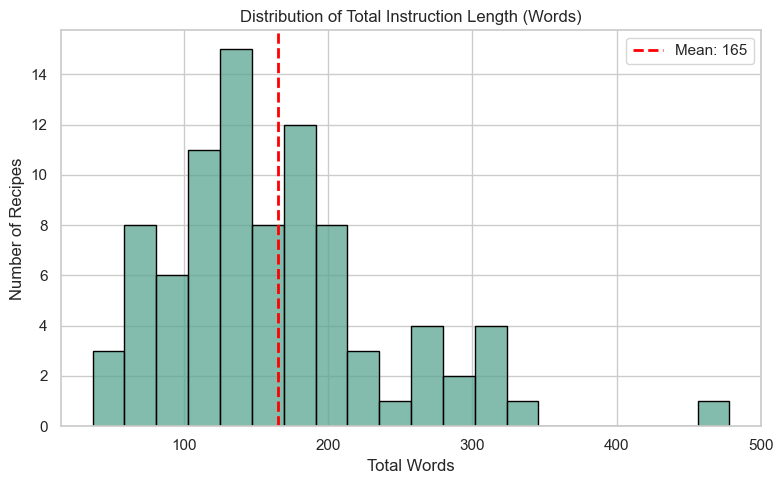

In [43]:
crest_color = sns.color_palette("crest")[1] 

plt.figure(figsize=(8,5))
sns.histplot(
    df["instruction_total_words"],
    bins=20,
    color=crest_color,
    edgecolor="black"
)

plt.title("Distribution of Total Instruction Length (Words)")
plt.xlabel("Total Words")
plt.ylabel("Number of Recipes")

mean_words = df["instruction_total_words"].mean()
plt.axvline(mean_words, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_words:.0f}")

plt.legend()
plt.tight_layout()
plt.show()


##### `4.6.3 Most common words appearing in the instructions`
To identify the most common words, all instruction steps are tokenized into individual words, normalized to lowercase, and then counted using a frequency distribution.

This reveals which verbs, ingredients, and actions dominate the procedural text, providing insights into typical cooking patterns.

C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\95512720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_verbs, y="verb", x="count", palette="crest")


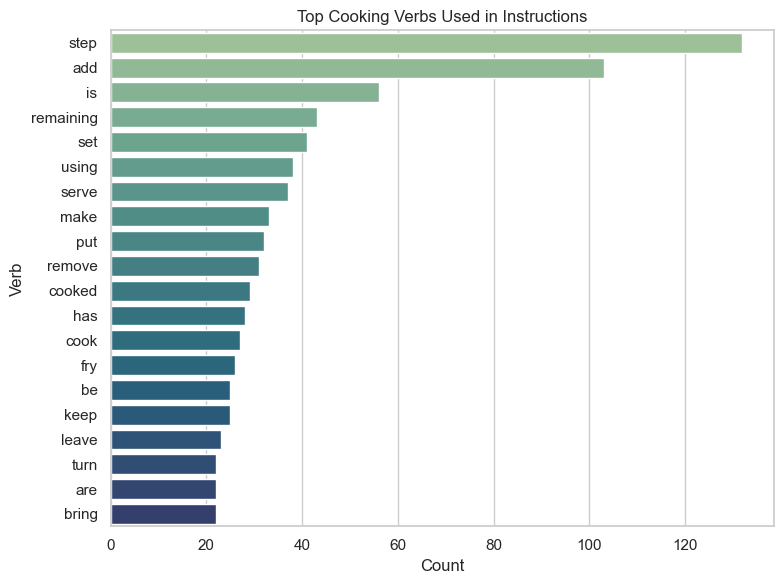

In [44]:
all_steps = [step for recipe in df["instructions"] for step in (recipe if isinstance(recipe, list) else [])]

# tokenize and POS-tag
tokens = nltk.word_tokenize(" ".join(all_steps).lower())
pos = nltk.pos_tag(tokens) #pos is a list of tuples (word, tag -- type of word)

# extracting verbs
verbs = [word for word, tag in pos if tag.startswith("VB")]

top_verbs = pd.DataFrame(Counter(verbs).most_common(20), columns=["verb", "count"])

plt.figure(figsize=(8,6))
sns.barplot(data=top_verbs, y="verb", x="count", palette="crest")
plt.title("Top Cooking Verbs Used in Instructions")
plt.xlabel("Count")
plt.ylabel("Verb")
plt.tight_layout()
plt.show()

##### `4.6.4 Bigram analysis of instruction words`
Bigrams are pairs of consecutive words that appear together in the instructions and we expect to see something like:
- cook for,
- add oil, 
- turn on, etc.


They are extracted by sliding a two-word window across all instruction text and counting how often each pair occurs. <br>This alows us to see repeating patterns in the instructions

C:\Users\mmart\AppData\Local\Temp\ipykernel_23304\1117103792.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_freq, y="bigram", x="count", palette="crest")


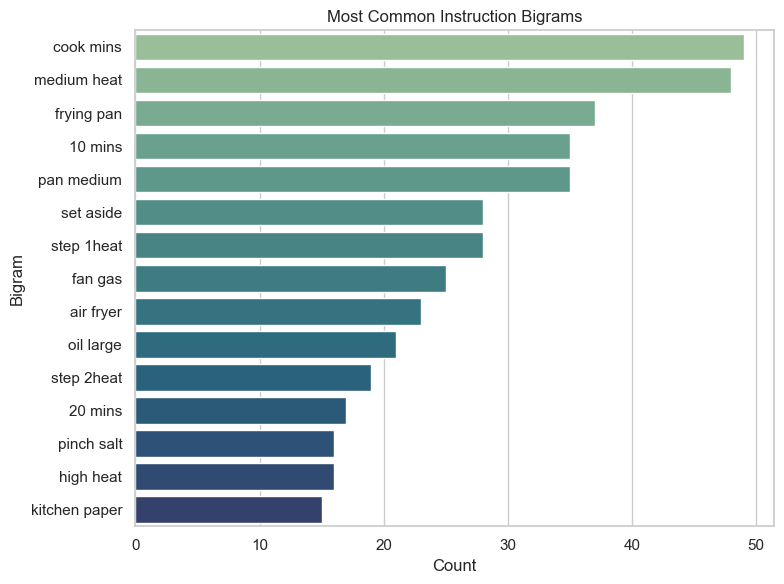

In [45]:
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words="english")
X = vectorizer.fit_transform(all_steps)
bigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1

bigram_freq = pd.DataFrame({"bigram": bigrams, "count": counts})
bigram_freq = bigram_freq.sort_values("count", ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=bigram_freq, y="bigram", x="count", palette="crest")
plt.title("Most Common Instruction Bigrams")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

-------

### Final Dataset description
The dataset consists of 87 unique recipes sourced exclusively from the BBC Good Food website and stored in a single JSON file. Each recipe entry includes key fields such as the title, image link, source URL, total preparation time, ingredients list, and step-by-step instructions (stored also in list). Additionally, every recipe contains a structured nutrients dictionary (e.g., kcal, fat, saturates), author information, dietary labels (vegan/vegetarian), and a meal type category. This rich structure enables flexible recipe retrieval based on user-defined criteria; for example, filtering dishes that are vegan, vegetarian, quick to prepare, or low in calories. Overall, the dataset is clean, well-structured, and suitable for modeling.